# PFDA Project - Winter 2024
*****

## Introduction

This notebook contains an analysis of historical windspeed data recorded by Met Éireann at the Johnstown Castle weather station<sup>[6]</sup> in County Wexford between 12 August 2003 and 01 December 2024<sup>[1]</sup>.

One of the closest windfarms to the Johnstown Castle weather station is located at Carnsore Point<sup>[7]</sup>, approximately 16km from the weather station<sup>[5]</sup>.

In [250]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.widgets import Button


In [251]:
# load data
df=pd.read_csv("hly1775.csv", skiprows=17, low_memory=False)
df

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir
0,12-aug-2003 01:00,-1,,4,,4,,,,,,7,,7,
1,12-aug-2003 02:00,-1,,4,,4,,,,,,7,,7,
2,12-aug-2003 03:00,-1,,4,,4,,,,,,7,,7,
3,12-aug-2003 04:00,-1,,4,,4,,,,,,7,,7,
4,12-aug-2003 05:00,-1,,4,,4,,,,,,7,,7,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186763,30-nov-2024 20:00,0,0.0,0,13.1,0,12.7,12.5,14.5,96,1010.7,2,17,2,190
186764,30-nov-2024 21:00,0,0.0,0,13.2,0,12.7,12.3,14.3,94,1010.3,2,18,2,180
186765,30-nov-2024 22:00,0,0.0,0,13.3,0,12.8,12.3,14.3,93,1010.0,2,18,2,190
186766,30-nov-2024 23:00,0,3.0,0,13.0,0,12.8,12.6,14.6,97,1009.8,2,15,2,190


In [252]:
# split date column into date and time columns
df[['date', 'time']] = df['date'].str.split(' ', n=1, expand=True)
# convert date column to datetime 
df["date"]=df['date'].astype('datetime64[ns]')
# set date column as index column
df.set_index('date', inplace=True)
# sanity check
df

date
2003-08-12      
2003-08-12      
2003-08-12      
2003-08-12      
2003-08-12      
              ..
2024-11-30    17
2024-11-30    18
2024-11-30    18
2024-11-30    15
2024-12-01    13
Name: wdsp, Length: 186768, dtype: object

In [253]:
# drop missing values from windspeed data
df["wdsp"]= df.loc[:,("wdsp")].replace(' ', np.nan)
df.dropna(inplace=True)
# convert windspeed values to floats
df['wdsp']=df['wdsp'].astype(float)
df["wdsp"]

date
2003-08-13     4.0
2003-08-13     4.0
2003-08-13     4.0
2003-08-13     4.0
2003-08-13     3.0
              ... 
2024-11-30    17.0
2024-11-30    18.0
2024-11-30    18.0
2024-11-30    15.0
2024-12-01    13.0
Name: wdsp, Length: 185772, dtype: float64

In [254]:
# describe windspeed column
df["wdsp"].describe()

count    185772.000000
mean          8.111696
std           4.283350
min           0.000000
25%           5.000000
50%           7.000000
75%          11.000000
max          35.000000
Name: wdsp, dtype: float64

In [255]:
# calculate mean figures for each numerical column per day
mean_per_day=df.groupby([df.index]).mean(numeric_only =True)
# sanity check
mean_per_day

,ind,ind.1,ind.2,ind.3,wdsp,ind.4
date,,,,,,
2003-08-13,-0.076923,0.0,0.0,2.0,4.076923,2.0
2003-08-14,0.000000,0.0,0.0,2.0,6.375000,2.0
2003-08-15,0.000000,0.0,0.0,2.0,5.916667,2.0
2003-08-16,0.000000,0.0,0.0,2.0,5.166667,2.0
2003-08-17,0.000000,0.0,0.0,2.0,6.250000,2.0
...,...,...,...,...,...,...
2024-11-27,0.000000,0.0,0.0,2.0,6.458333,2.0
2024-11-28,0.000000,0.0,0.0,2.0,11.708333,2.0
2024-11-29,0.000000,0.0,0.0,2.0,15.708333,2.0


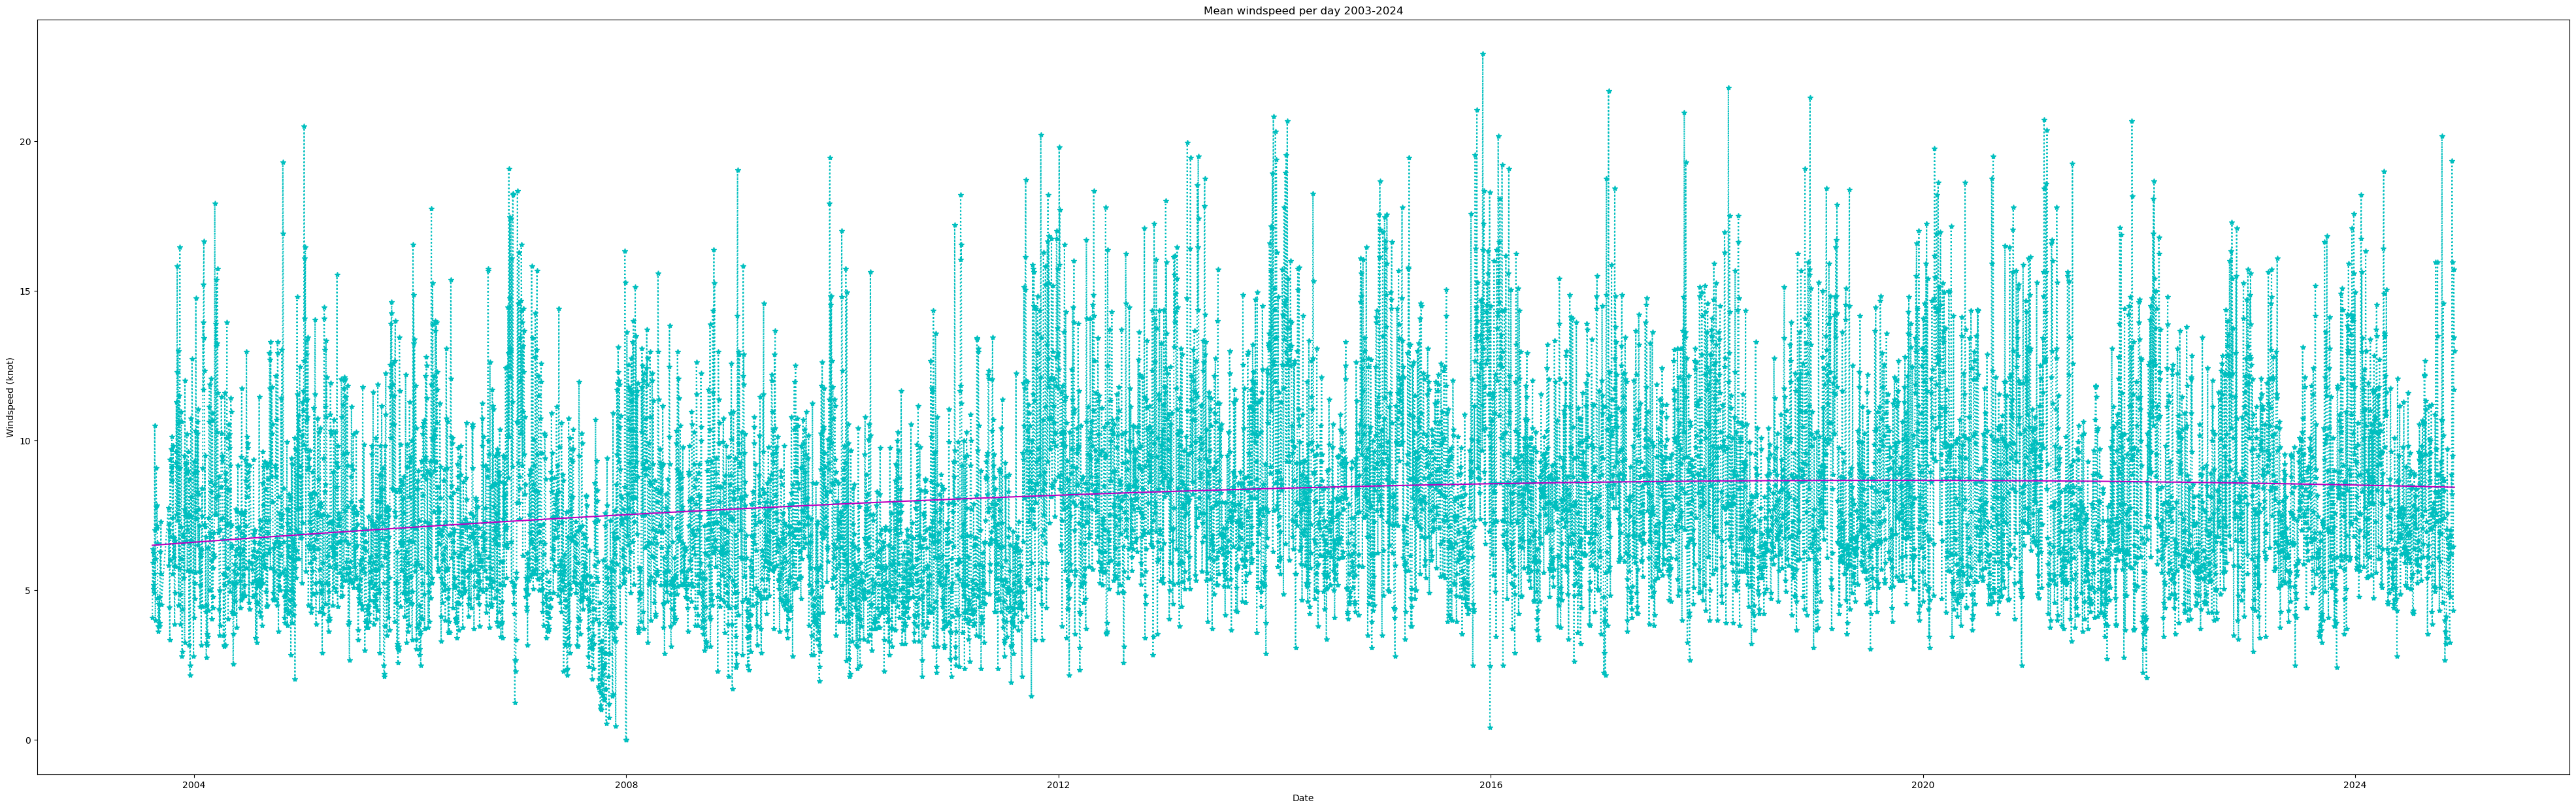

In [256]:
# plot windspeed vs date
fig, ax = plt.subplots(figsize=(50,15))

wdsp=mean_per_day["wdsp"]
wdsp=wdsp.to_numpy()
dates = mean_per_day.index
dates_num = mdates.date2num(dates)

# label axes
ax.set_xlabel("Date")
ax.set_ylabel("Windspeed (knot)")
# add title
ax.set_title("Mean windspeed per day 2003-2024")

ax.plot(mean_per_day.index, wdsp, "*:c")
# plot trendline
ax.plot(dates_num, np.poly1d(np.polyfit(dates_num, wdsp, 2))(dates_num), '-m') # reference 4

0

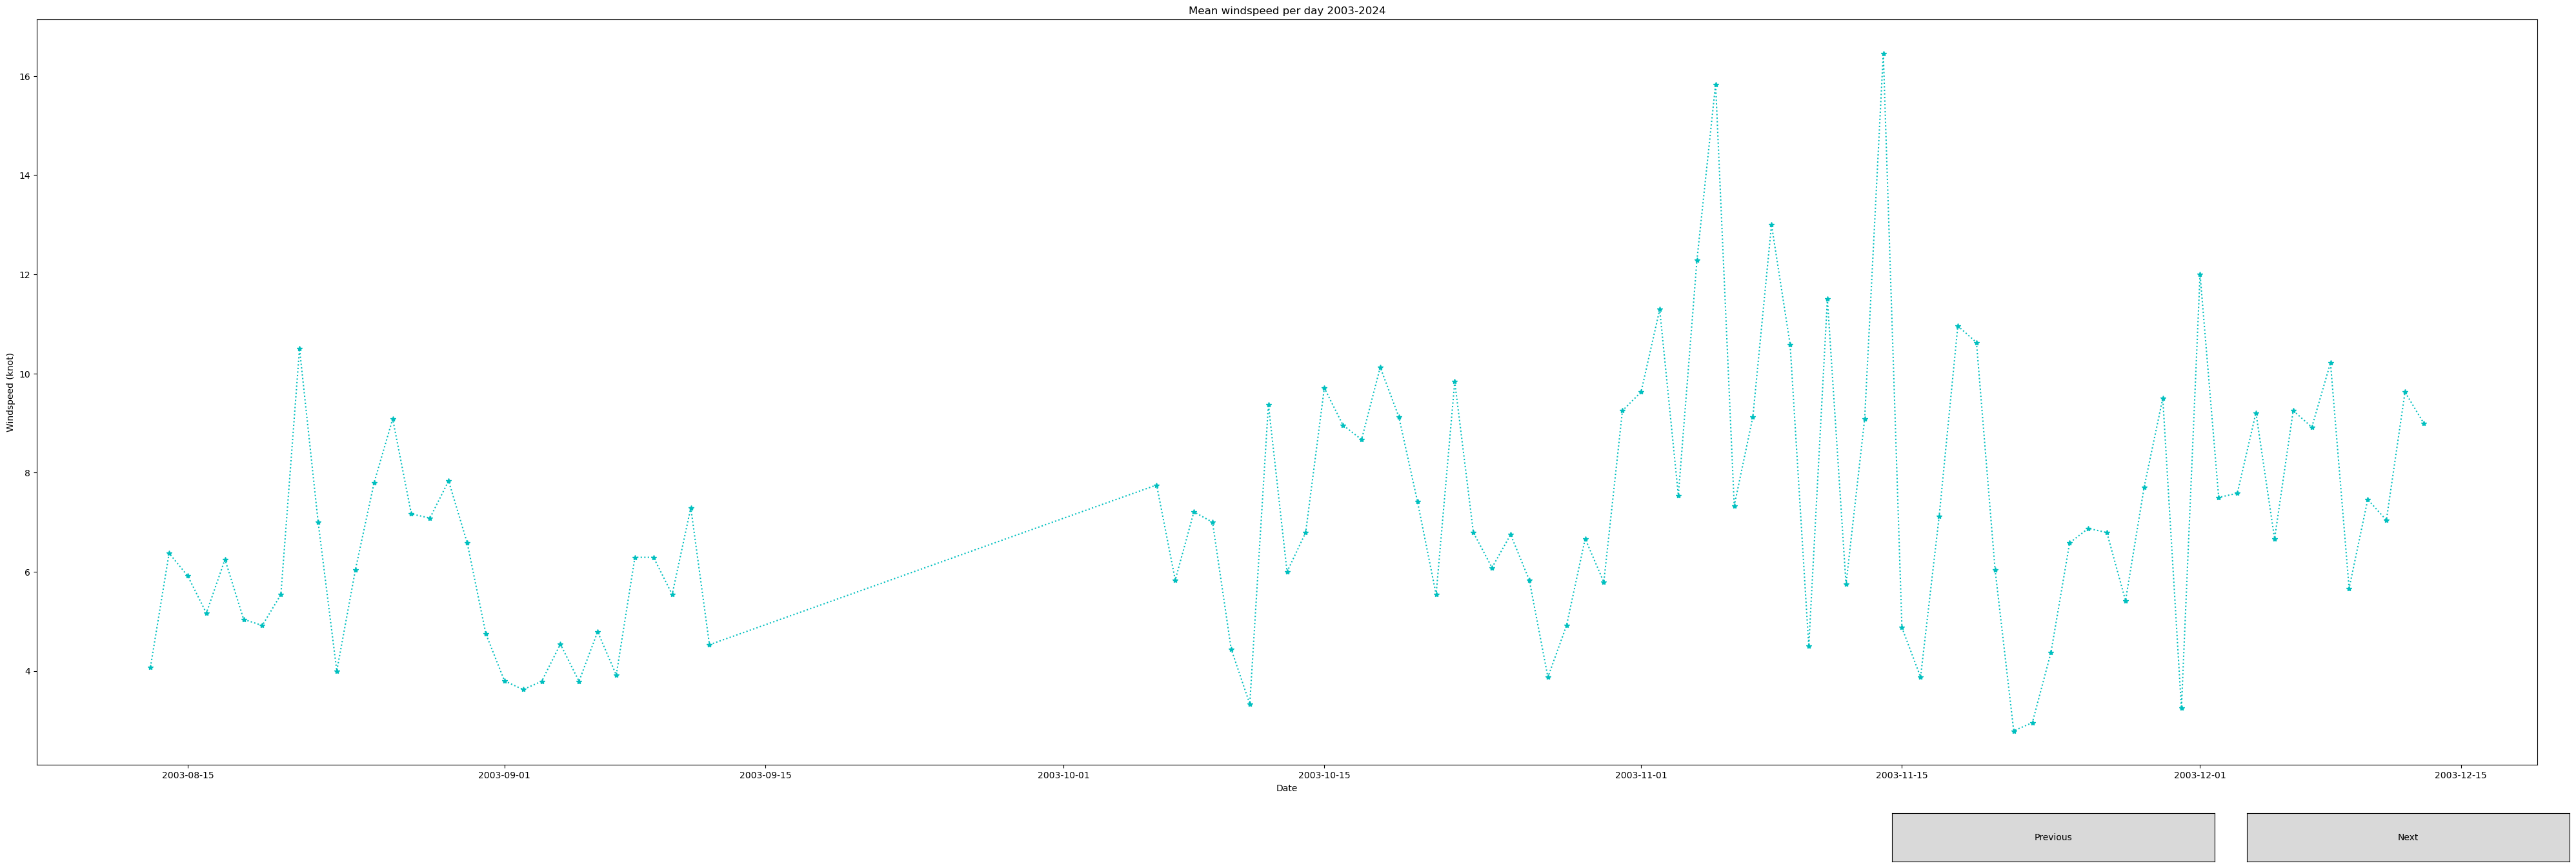

In [257]:
# plot windspeed vs date
fig, ax = plt.subplots(figsize=(50,15))

wdsp=mean_per_day["wdsp"]
wdsp=wdsp.to_numpy()

# set visible range (reference 8)
display_range = 100
current_index = 0

# label axes
ax.set_xlabel("Date")
ax.set_ylabel("Windspeed (knot)")
# add title
ax.set_title("Mean windspeed per day 2003-2024")

# plot data within current visible range
plot=ax.plot(mean_per_day.index[current_index:current_index + display_range], wdsp[current_index:current_index + display_range], "*:c")

# define function for scrolling through plot (reference 8)
def update_plot(forward=True):
    global current_index
    step = display_range if forward else -display_range
    current_index += step
 
    if current_index < 0:
        current_index = 0
    elif current_index + display_range > len(mean_per_day.index):
        current_index = len(mean_per_day.index) - display_range
 
    plot.set_xdata(mean_per_day.index[current_index:current_index + display_range])
    plot.set_ydata(wdsp[current_index:current_index + display_range])
    plt.draw()

# Create buttons
ax_next_button = plt.axes([0.81, 0.01, 0.1, 0.05])
ax_prev_button = plt.axes([0.7, 0.01, 0.1, 0.05])
 
next_button = Button(ax_next_button, 'Next')
prev_button = Button(ax_prev_button, 'Previous')
 
# Connect buttons to update functions
next_button.on_clicked(lambda event: update_plot(forward=True))
prev_button.on_clicked(lambda event: update_plot(forward=False))
 

In [258]:
# take the section of the dataset covering november 2024
full_month=df.iloc[185051:185771]
# sanity check
full_month

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,time
date,,,,,,,,,,,,,,,
2024-11-01,0,0.0,0,11.6,0,10.1,8.5,11.1,81,1024.7,2,4.0,2,270,00:00
2024-11-01,0,0.0,0,11.4,0,9.9,8.4,11.0,81,1024.4,2,3.0,2,280,01:00
2024-11-01,0,0.0,0,11.3,0,9.9,8.4,11.0,82,1024.4,2,3.0,2,280,02:00
2024-11-01,0,0.0,0,11.2,0,9.8,8.4,11.1,83,1024.3,2,2.0,2,290,03:00
2024-11-01,0,0.0,0,11.7,0,9.9,8.1,10.8,78,1024.1,2,4.0,2,270,04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-30,0,0.0,0,13.1,0,12.7,12.4,14.4,95,1011.2,2,17.0,2,190,19:00
2024-11-30,0,0.0,0,13.1,0,12.7,12.5,14.5,96,1010.7,2,17.0,2,190,20:00
2024-11-30,0,0.0,0,13.2,0,12.7,12.3,14.3,94,1010.3,2,18.0,2,180,21:00


In [259]:
# calculate the mean values for november 2024
nov_means=full_month.groupby([full_month.index]).mean(numeric_only =True)
# sanity check
nov_means

,ind,ind.1,ind.2,ind.3,wdsp,ind.4
date,,,,,,
2024-11-01,0.0,0.0,0.0,2.0,3.625000,2.0
2024-11-02,0.0,0.0,0.0,2.0,3.208333,2.0
2024-11-03,0.0,0.0,0.0,2.0,4.125000,2.0
2024-11-04,0.0,0.0,0.0,2.0,3.416667,2.0
2024-11-05,0.0,0.0,0.0,2.0,7.041667,2.0
2024-11-06,0.0,0.0,0.0,2.0,7.583333,2.0
2024-11-07,0.0,0.0,0.0,2.0,9.708333,2.0
2024-11-08,0.0,0.0,0.0,2.0,6.750000,2.0
2024-11-09,0.0,0.0,0.0,2.0,6.041667,2.0


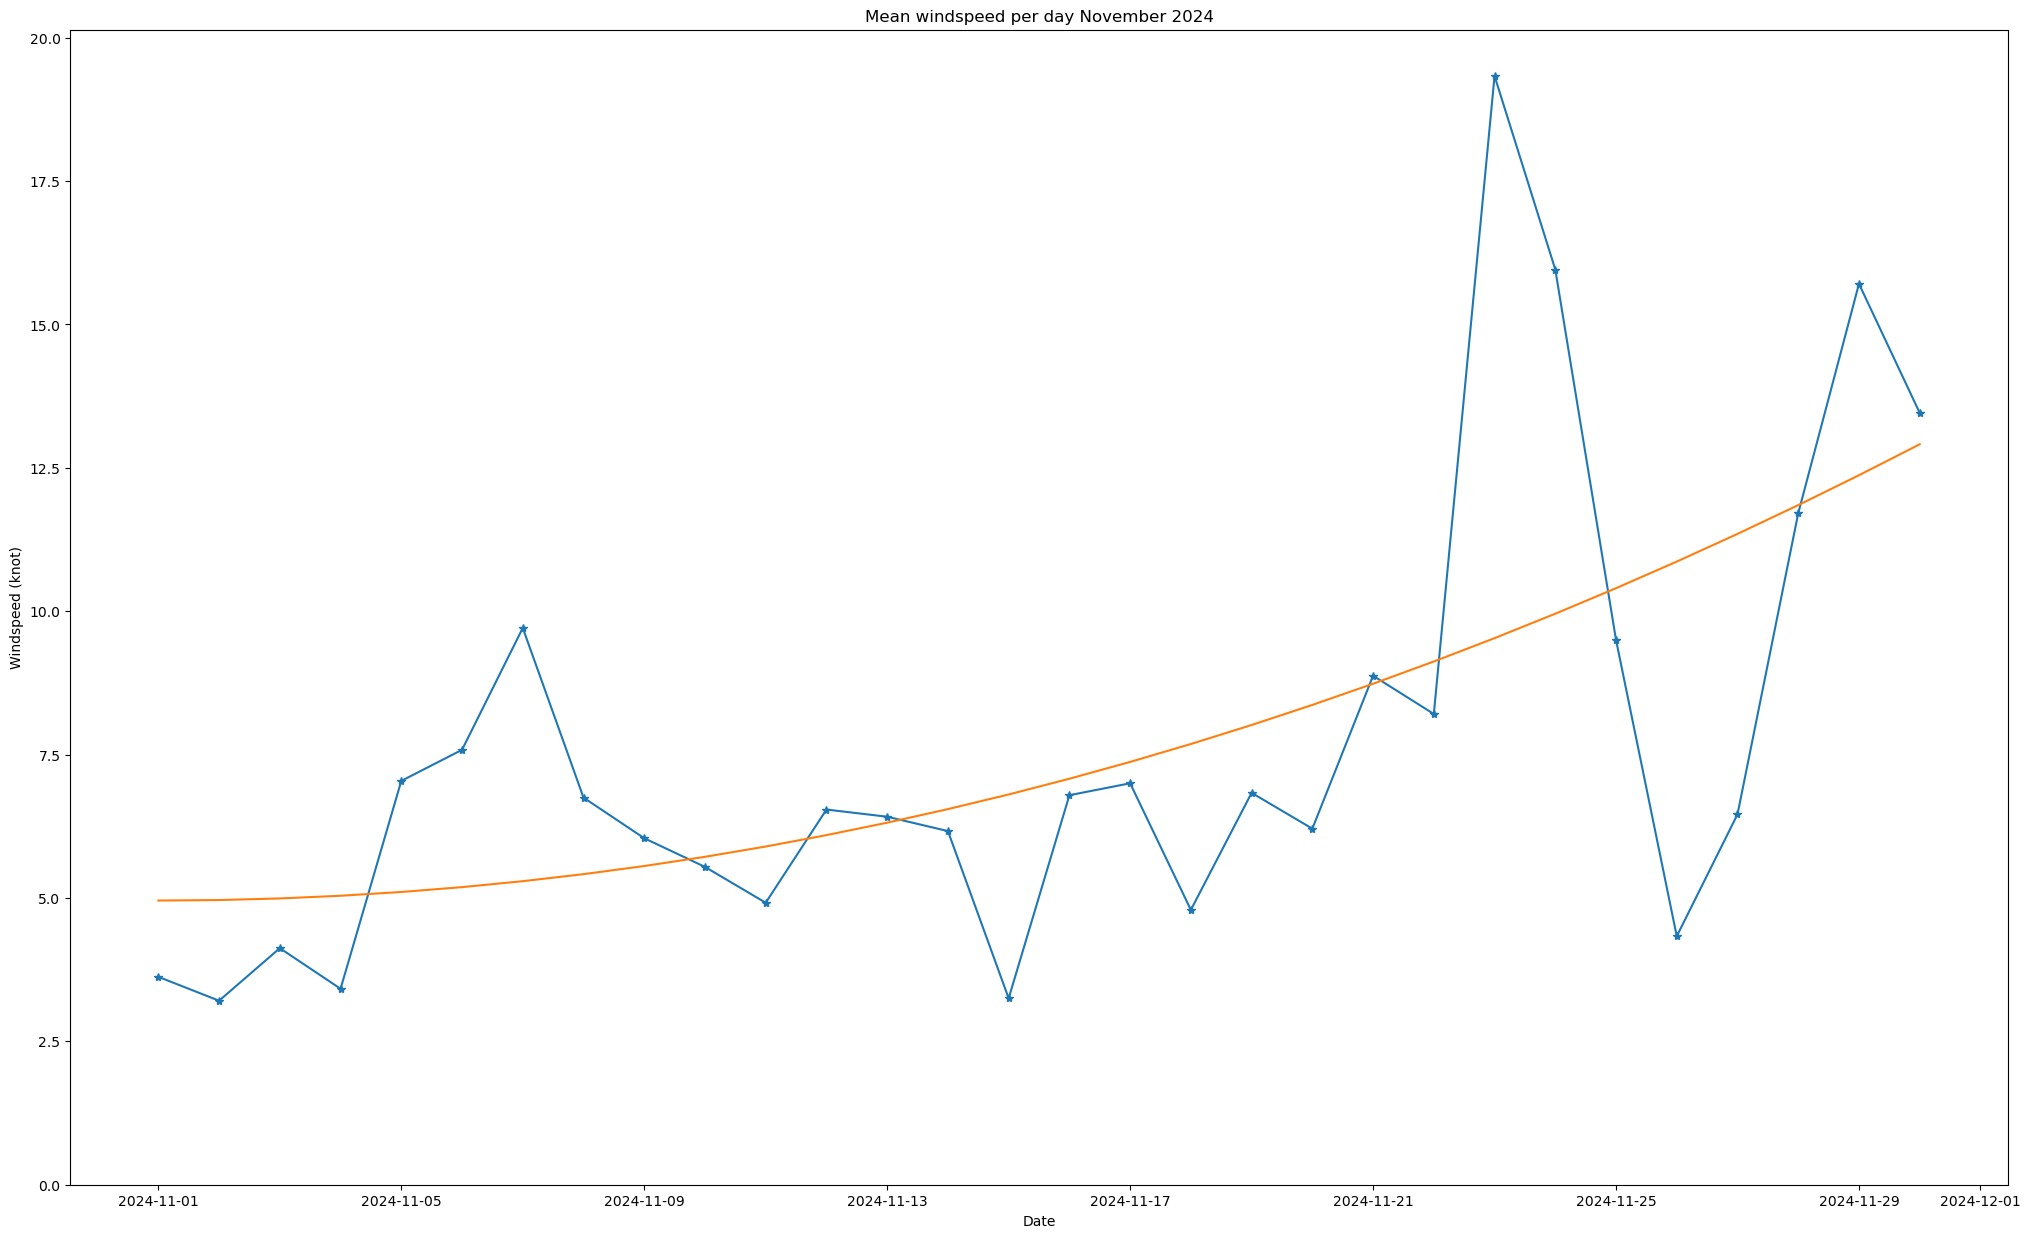

In [260]:
# plot windspeed vs date
fig, ax = plt.subplots(figsize=(25,15))

nov_wdsp=nov_means["wdsp"]
nov_wdsp=nov_wdsp.to_numpy()
nov_dates=nov_means.index
nov_dates_num=mdates.date2num(nov_dates)

# label axes
ax.set_xlabel("Date")
ax.set_ylabel("Windspeed (knot)")
# add title
ax.set_title("Mean windspeed per day November 2024")

ax.plot(nov_means.index, nov_wdsp, "*-")
ax.set_ylim(ymin=0)
# plot trendline
ax.plot(nov_dates_num, np.poly1d(np.polyfit(nov_dates_num, nov_wdsp, 2))(nov_dates_num)) # reference 4